# Parte 1 - Evolutionary Model

Escolhemos usar o algoritmo Genetic Programming para a primeira tarefa, nos baseamos no artigo "Reactive Control of Ms. Pac Man using Information Retrieval based on Genetic Programming" dos autores Matthias F. Brandstetter e Samad Ahmadi para escolher as funções de avaliação. A ideia basicamente seria gerar uma árvore de decisões que retornaria uma pontuação de cada movimento possível para cada ação do pacman e baseado nessa pontuação poderiamos tomar decisões no jogo.

- Variação dos parâmetros: tamanho da população, número de gerações, peso das funções na árvore de decisões;
- Função de Fitness: Média dos scores de 5 jogos;
- Tamanho da população: [25,  50,  75, 100, 125, 150, 175, 200];
- Quantidade de gerações: [10, 55, 100];
- Critério de parada: Atingir a quantidade máxima de gerações;
- Critério de seleção:  
- Tipo de Crossover: 
- Tipo de Mutação:
- Taxa de Crossover:
- Taxa de Mutação:


O processo do algoritmo principal é:

1. Geração da população inicial, a árvore pode ser construída utilizando divisão, multiplicação, soma e subtração
2. Para cada individuo executamos o jogo 5 vezes
3. Cálculo do fitness é a média dos scores dos 5 jogos
4. Após a avaliação da população completa, escolhemos o nosso melhor fitness
5. Selecionamos nosso melhor individuo local
6. Para cada geração, selecionamos alguns individuos 
7. Recombinamos os individuos selecionados
8. Mutamos alguns dos individuos selecionados
9. Repetimos os passos 2, 3 e 4
10. Selecionamos os melhores individuos da população completa 
11. Selecionamos o melhor individuo global


Para o controller o algoritmo é:
1. Para cada movimento válido, calcular as funções de distância aos fantasmas, distância as próximas comidas, distância das próximas paredes, distância dos fantasmas editáveis (após a energia), comida em distância K =4, fantasma em distância K=4.
2. Calculamos o valor de cada movimento e escolhemos o melhor de acordo com a árvore (cromossomo)
3. Retornamos o melhor movimento

In [15]:
import numpy as np

generations = np.arange(10,110, 45)
population = np.arange(25, 100, 25)

In [20]:
!python pacman.py -p GPAgent -x 1 -n 11  --gen 10 --pop 10 --layout smallClassic

python: can't open file 'pacman.py': [Errno 2] No such file or directory


In [9]:
for gene in generations:
    for popul in population:
        !python ../Project_ML/pacman.py -p GPAgent -x 1 -n 11 -l smallClassic --gen gene --pop popul

python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacman.py': [Errno 2] No such file or directory
python: can't open file '../Project_ML/pacm

In [17]:
generations

array([ 10,  55, 100])

A função de decisão no caso do pacman é bem sensível, fizemos alguns testes colocando peso no valor das funções como por exemplo: (-20) * distância do fantasma mais próximo, como penalização. A função é bem sensível e tivemos alguns problemas para convergir a solução geral.

# Parte 2 - Reinforcement Learning

Escolhemos usar o algoritmo de Q-Learning para esta parte do projeto. O Q-Learning é um algoritmo chamado de *value-based. *****Isso significa que o algoritmo usa uma função de valor que é atualizada ao longo de suas iterações. $Q(s,a)$ é o valor esperado ao realizar uma ação $a$ em um estado $s$. O agente mantém uma tabela $Q[S,A]$ em que $S$ é o conjunto de estados e $A$ o conjunto de ações.

A função de valor é conhecida como *Q-Function* e recebe duas entradas: os estados $s$ e as ações $a$:

$$Q(s_t, a_t) = E[R_{t+1} + \gamma R_{t+2} + \gamma ^2 R_{t+3} + ...] *[s_t,a_t]$$

Em que $Q(s_t, a_t)$ é um *Q-value* para um estado em particular, $E$ representa o *reward* cumulativo esperado e $[s_t,a_t]$ é o estado e ação atual e $\gamma$ é um parâmetro de desconto do *reward*.

O processo do algoritmo é o seguinte:

1. Inicialize sua tabela que armazena os possíveis valores de $Q(s,t)$;
2. Escolha uma ação;
3. Realize a ação;
4. Meça o *reward* daquela ação tomada;
5. Atualize os valores de $Q(s,t)$.

Para atualizar os valores de $Q$, é comum levar em conta alguns parâmetros. Entre eles podemos notar:

- Alpha ($\alpha$): Representa a *learning rate*
- Epsilon($\epsilon$): Representa a *exploration rate*
- Gamma($\gamma$): Representa o desconto do *reward*

A partir de $\alpha$ e $\gamma$, calculamos o novo valor:

$$Q(s,a)_{novo} = Q(s,a)_{atual} + \alpha*[R(s,a)+\gamma* max(Q(s',a')_{futuro} - Q(s,a)_{atual}]$$

Portanto, utilizamos os parâmetros de *learning rate* e o desconto do *reward* para calcular o novo valor de $Q$.

Além disso, para o caso especial do Pacman, precisamos decidir em quais momentos ele deve tomar a melhor ação possível, baseada em suas experiências passadas, e em que momento deve tomar ações aleatórias. Para isso temos o parâmetro de *exploration rate*. Ele determina a porcentagem de vezes que o Pacman escolherá uma ação aleatória e, também, quando escolherá uma ação baseada em dados passados. É importante que no início do treinamento o Pacman tenha total liberdade para explorar, ou seja, escolha seu caminho aleatoriamente. Ao longo das iterações de treino, esta *exploration rate* é reduzida, já que ele tem agora mapeado suas experiências passadas. Desta forma, ao longo das sessões de treino, esperamos que as sessões passadas influenciem nas decisões tomadas.

Cada sessão de treino termina quando Pacman morre, ou quando ele ganha o jogo. Definimos 50 sessões de treino e, depois, como pedido, são rodadas 10 sessões de jogo com os parâmetros obtidos.

Esta, portanto, foram as funções de valor da MDP usada para calcular os possíveis estados e *rewards* do Pacman.

/home/rabbitvictor/Documents/projetoML/machine_learning/projects/3_ag_rl/RL
('ALPHA', 0.2)
('DISCOUNT', 0.8)
('EXPLORATION', 0.05)
Beginning 50 episodes of Training
Training Done (turning off epsilon and alpha)
---------------------------------------------
Pacman emerges victorious! Score: 984
Pacman emerges victorious! Score: 986
Pacman emerges victorious! Score: 989
Pacman emerges victorious! Score: 976
Pacman emerges victorious! Score: 1172
Pacman emerges victorious! Score: 977
Pacman died! Score: -137
Pacman emerges victorious! Score: 974
Pacman emerges victorious! Score: 947
Pacman emerges victorious! Score: 978
Average Score: 884.6
Scores:        984, 986, 989, 976, 1172, 977, -137, 974, 947, 978
Win Rate:      9/10 (0.90)
Record:        Win, Win, Win, Win, Win, Win, Loss, Win, Win, Win


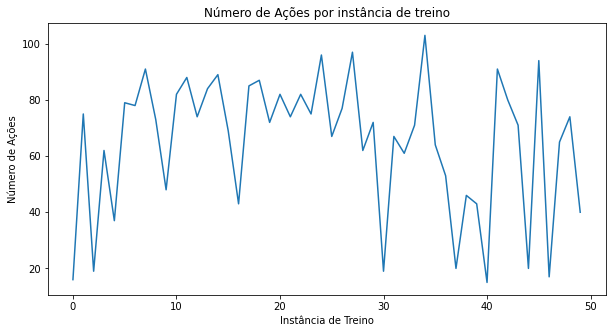

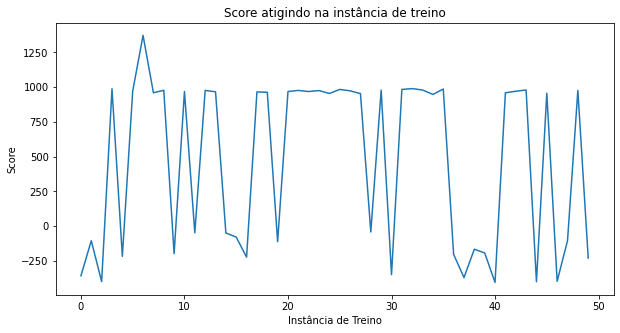

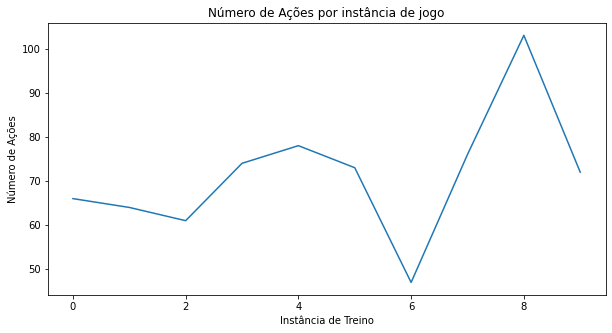

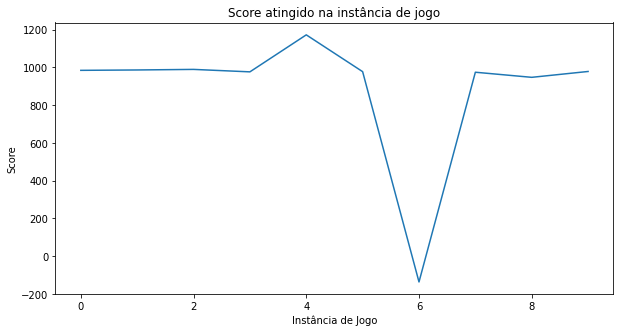

/home/rabbitvictor/Documents/projetoML/machine_learning/projects/3_ag_rl


In [1]:
# Execução das sessões de treino e das 10 execuções com os parâmetros obtido em treinamento.

%cd RL
!python pacman.py -p ApproximateQAgent -a extractor=SimpleExtractor -x 50 -n 60 -l smallClassic -q

import matplotlib.pyplot as plt
import numpy as np
file = open('stats.txt', 'r')
count = 0
trainingActions = []
trainingScores = []
gameActions = []
gameScores = []
while(count < 60):
    line = file.readline()
    line = line.strip().split(",")
    
    if(count < 50):
        trainingActions.append(int(line[0]))
        trainingScores.append(int(line[1]))
        
    else:
        gameActions.append(int(line[0]))
        gameScores.append(int(line[1]))
    
    count+= 1
file.close()
tActions = np.array(trainingActions)
plt.figure(figsize=(10,5))
plt.title('Número de Ações por instância de treino')
plt.xlabel('Instância de Treino')
plt.ylabel('Número de Ações')
plt.plot(tActions)
plt.show()

tScores = np.array(trainingScores)
plt.figure(figsize=(10,5))
plt.title('Score atigindo na instância de treino')
plt.xlabel('Instância de Treino')
plt.ylabel('Score')
plt.plot(tScores)
plt.show()

gActions = np.array(gameActions)
plt.figure(figsize=(10,5))
plt.title('Número de Ações por instância de jogo')
plt.xlabel('Instância de Treino')
plt.ylabel('Número de Ações')
plt.plot(gActions)
plt.show()

gScores = np.array(gameScores)
plt.figure(figsize=(10,5))
plt.title('Score atingido na instância de jogo')
plt.xlabel('Instância de Jogo')
plt.ylabel('Score')
plt.plot(gScores)
plt.show()
file2 = open('stats.txt', 'w')
file2.close()
%cd ..

/home/rabbitvictor/Documents/projetoML/machine_learning/projects/3_ag_rl/RL
('ALPHA', 0.2)
('DISCOUNT', 0.8)
('EXPLORATION', 0.05)
Beginning 50 episodes of Training
Training Done (turning off epsilon and alpha)
---------------------------------------------
Pacman died! Score: 167
Pacman emerges victorious! Score: 1525
Pacman died! Score: 134
Pacman emerges victorious! Score: 1730
Pacman emerges victorious! Score: 1712
Pacman emerges victorious! Score: 1740
Pacman emerges victorious! Score: 1539
Pacman emerges victorious! Score: 1324
Pacman died! Score: 62
Pacman emerges victorious! Score: 1741
Average Score: 1167.4
Scores:        167, 1525, 134, 1730, 1712, 1740, 1539, 1324, 62, 1741
Win Rate:      7/10 (0.70)
Record:        Loss, Win, Loss, Win, Win, Win, Win, Win, Loss, Win


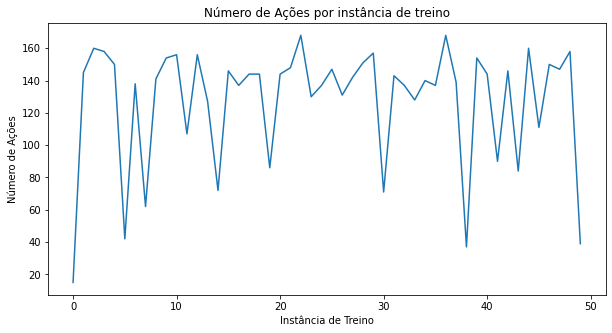

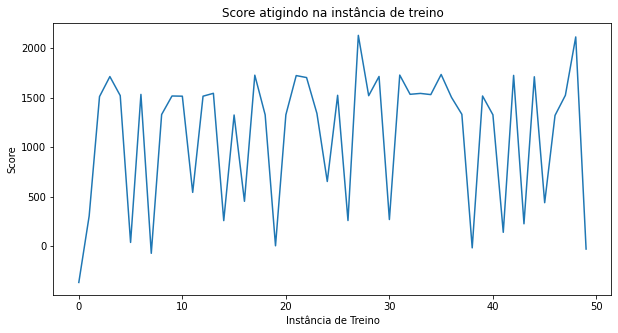

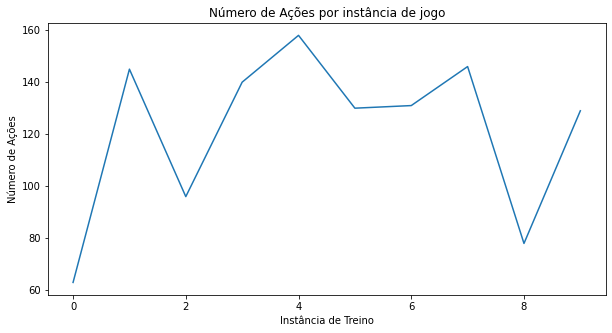

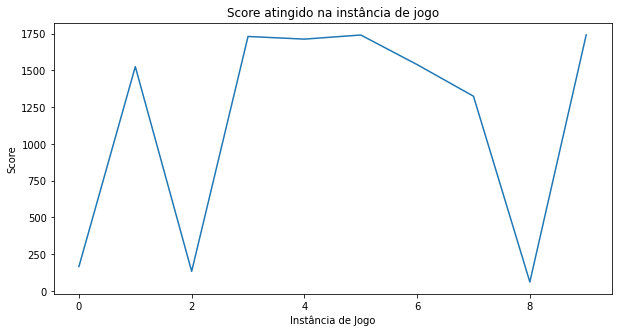

/home/rabbitvictor/Documents/projetoML/machine_learning/projects/3_ag_rl


In [2]:
# Execução das sessões de treino e das 10 execuções com os parâmetros obtido em treinamento.

%cd RL
!python pacman.py -p ApproximateQAgent -a extractor=SimpleExtractor -x 50 -n 60 -l mediumClassic -q

import matplotlib.pyplot as plt
import numpy as np

file = open('stats.txt', 'r')
count = 0
trainingActions = []
trainingScores = []
gameActions = []
gameScores = []
while(count < 60):
    line = file.readline()
    line = line.strip().split(",")
    
    if(count < 50):
        trainingActions.append(int(line[0]))
        trainingScores.append(int(line[1]))
        
    else:
        gameActions.append(int(line[0]))
        gameScores.append(int(line[1]))
    
    count+= 1
file.close()
tActions = np.array(trainingActions)
plt.figure(figsize=(10,5))
plt.title('Número de Ações por instância de treino')
plt.xlabel('Instância de Treino')
plt.ylabel('Número de Ações')
plt.plot(tActions)
plt.show()

tScores = np.array(trainingScores)
plt.figure(figsize=(10,5))
plt.title('Score atigindo na instância de treino')
plt.xlabel('Instância de Treino')
plt.ylabel('Score')
plt.plot(tScores)
plt.show()

gActions = np.array(gameActions)
plt.figure(figsize=(10,5))
plt.title('Número de Ações por instância de jogo')
plt.xlabel('Instância de Treino')
plt.ylabel('Número de Ações')
plt.plot(gActions)
plt.show()

gScores = np.array(gameScores)
plt.figure(figsize=(10,5))
plt.title('Score atingido na instância de jogo')
plt.xlabel('Instância de Jogo')
plt.ylabel('Score')
plt.plot(gScores)
plt.show()
file2 = open('stats.txt', 'w')
file2.close()
%cd ..

/home/rabbitvictor/Documents/projetoML/machine_learning/projects/3_ag_rl/RL
('ALPHA', 0.2)
('DISCOUNT', 0.8)
('EXPLORATION', 0.05)
Beginning 50 episodes of Training
Training Done (turning off epsilon and alpha)
---------------------------------------------
Pacman died! Score: 435
Pacman emerges victorious! Score: 2484
Pacman emerges victorious! Score: 2890
Pacman emerges victorious! Score: 2836
Pacman emerges victorious! Score: 2870
Pacman emerges victorious! Score: 2674
Pacman emerges victorious! Score: 2887
Pacman emerges victorious! Score: 3080
Pacman died! Score: 1596
Pacman emerges victorious! Score: 2832
Average Score: 2458.4
Scores:        435, 2484, 2890, 2836, 2870, 2674, 2887, 3080, 1596, 2832
Win Rate:      8/10 (0.80)
Record:        Loss, Win, Win, Win, Win, Win, Win, Win, Loss, Win


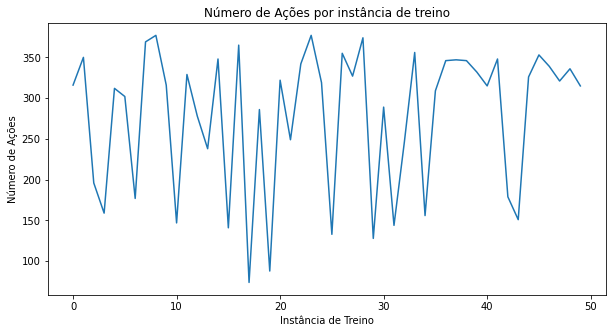

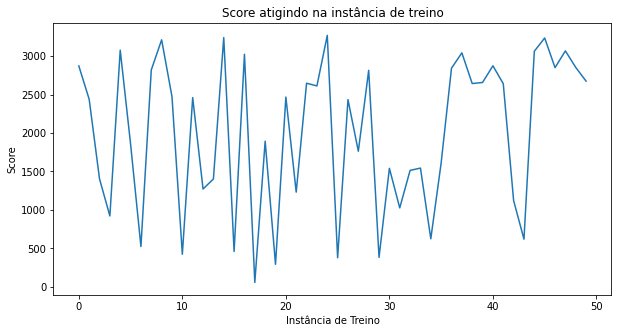

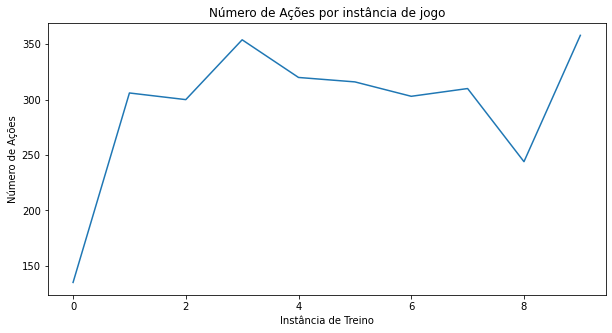

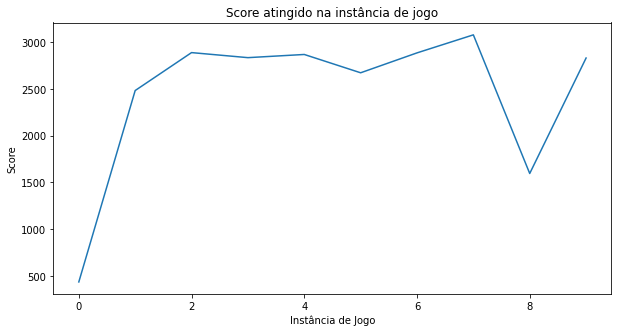

/home/rabbitvictor/Documents/projetoML/machine_learning/projects/3_ag_rl


In [3]:
# Execução das sessões de treino e das 10 execuções com os parâmetros obtido em treinamento.
%cd RL
!python pacman.py -p ApproximateQAgent -a extractor=SimpleExtractor -x 50 -n 60 -l originalClassic -q

import matplotlib.pyplot as plt
import numpy as np

file = open('stats.txt', 'r')
count = 0
trainingActions = []
trainingScores = []
gameActions = []
gameScores = []
while(count < 60):
    line = file.readline()
    line = line.strip().split(",")
    if(count < 50):
        trainingActions.append(int(line[0]))
        trainingScores.append(int(line[1]))
        
    else:
        gameActions.append(int(line[0]))
        gameScores.append(int(line[1]))
    
    count+= 1
file.close()

tActions = np.array(trainingActions)
plt.figure(figsize=(10,5))
plt.title('Número de Ações por instância de treino')
plt.xlabel('Instância de Treino')
plt.ylabel('Número de Ações')
plt.plot(tActions)
plt.show()

tScores = np.array(trainingScores)
plt.figure(figsize=(10,5))
plt.title('Score atigindo na instância de treino')
plt.xlabel('Instância de Treino')
plt.ylabel('Score')
plt.plot(tScores)
plt.show()

gActions = np.array(gameActions)
plt.figure(figsize=(10,5))
plt.title('Número de Ações por instância de jogo')
plt.xlabel('Instância de Treino')
plt.ylabel('Número de Ações')
plt.plot(gActions)
plt.show()

gScores = np.array(gameScores)
plt.figure(figsize=(10,5))
plt.title('Score atingido na instância de jogo')
plt.xlabel('Instância de Jogo')
plt.ylabel('Score')
plt.plot(gScores)
plt.show()
file2 = open('stats.txt', 'w')
file2.close()
%cd ..

# Resultados obtidos

Podemos ver pelos gráficos das sessões de treino que o número de ações executadas pelo Pacman apenas cresceu ao decorrer das iterações. Isto mostra que o algoritmo de *Q-Learning* funcionou no sentido de aumentar o tempo que o Pacman passa dentro do jogo. Os pontos em que o número de ações diminui são apenas nas instâncias dos treinos em que ele perdeu cedo. Olhando para os *scores* obtidos nos treinos, vemos que os gráficos se relacionam - quanto mais ações o Pacman realizou dentro do jogo, maior foi sua pontuação. Este comportamento pode ser observado para os três mapas em que testamos.